In [1]:
from pyopenms import *
import matplotlib.pyplot as plt

In [2]:
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("Fusion_180220_43.mzML", "Scerevisiae_UPS2_1802.fasta", protein_ids, peptide_ids)
exp = MSExperiment()
MzMLFile().load("Fusion_180220_43.mzML", exp)
filtered = MSExperiment()
for s in exp:
    if s.getMSLevel() == 2:
        filtered.addSpectrum(s)

In [3]:
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
            obs_int = [element / max(obs_int) for element in obs_int] 
            theo_int = [element * -1 for element in theo_int] 
            plt.figure(figsize=(12,8))
            plt.bar(obs_mz, obs_int, width = 3.0)
            plt.bar(theo_mz, theo_int, width = 3.0)
            plt.title(title)
            plt.ylabel('intensity')
            plt.xlabel('m/z')

Peptide ID m/z: 727.840698242188
 - Peptide hit rank: 1
 - Peptide hit sequence: TIEADLTADDFSR
Number of matched peaks: 9
ion	theo. m/z	observed m/z
b4+	1	415.218728423771	415.2029113769531
b11++	2	596.772054694921	597.0421142578125
y11++	2	620.278035710871	620.5299682617188
y5+	1	639.273284678971	639.0779418945312
y12++	2	676.820067886321	676.527587890625
y6+	1	710.310398838471	710.3089599609375
b9+	1	930.4414744764711	930.4962768554688
y11+	1	1239.548794954971	1239.2255859375
y12+	1	1352.632859305871	1352.442626953125
Peptide ID m/z: 616.798156738281
 - Peptide hit rank: 1
 - Peptide hit sequence: EQAGENTLSQR
Number of matched peaks: 5
ion	theo. m/z	observed m/z
b3+	1	329.145563104771	329.0989990234375
y6++	2	359.695754280221	360.13763427734375
y4+	1	503.29362467897107	502.860107421875
b5+	1	515.2096214237711	515.0248413085938
b8+	1	843.3842931893712	843.3905639648438
Peptide ID m/z: 560.768798828125
 - Peptide hit rank: 1
 - Peptide hit sequence: APESVADFER
Number of matched peaks: 

b11+	1	1379.4692255573711	1379.1622314453125
y11+	1	1396.5321597806712	1396.291748046875
Peptide ID m/z: 724.364685058594
 - Peptide hit rank: 1
 - Peptide hit sequence: SHGSPIHNNQLSR
Number of matched peaks: 7
ion	theo. m/z	observed m/z
y4+	1	503.29362467897107	503.0008544921875
b6+	1	579.288539678971	578.9103393554688
y11++	2	611.817995790621	611.622802734375
b12++	2	636.8076282587211	636.659423828125
y12++	2	680.347451902271	680.5892333984375
b7+	1	716.347451902271	716.3502197265625
y9+	1	1078.575221859271	1078.23681640625
Peptide ID m/z: 544.792785644531
 - Peptide hit rank: 1
 - Peptide hit sequence: LNAITLDGDR
Number of matched peaks: 6
ion	theo. m/z	observed m/z
b5++	2	257.15520160477104	256.8377685546875
b4+	1	412.255447519471	412.25775146484375
y8++	2	430.72725193972093	431.13031005859375
b9++	2	457.23490998757103	457.343017578125
y9++	2	487.74871603542095	488.0440673828125
b5+	1	513.3031267427709	513.03759765625
Peptide ID m/z: 662.828369140625
 - Peptide hit rank: 1
 - Pepti

 - Peptide hit sequence: VIDIHVGGDC(Carbamidomethyl)LK
Number of matched peaks: 14
ion	theo. m/z	observed m/z
y2++	2	130.60207286552102	130.99575805664062
y1+	1	147.112804913371	147.14825439453125
b2+	1	213.159755104771	213.46185302734375
b4++	2	221.139020040971	221.15280151367188
y2+	1	260.196869264271	259.88433837890625
y7++	2	374.68654067712106	374.36395263671875
b8++	2	396.22414739187104	396.49005126953125
y8++	2	443.21599678877106	442.85491943359375
b10++	2	533.752943964221	533.531494140625
y4+	1	535.254462408971	535.0296630859375
b5+	1	578.3296758384711	578.3248901367188
y5+	1	592.275926504671	592.393798828125
b8+	1	791.4410183169712	791.1978759765625
b10+	1	1066.498611461671	1066.4921875
Peptide ID m/z: 510.247253417969
 - Peptide hit rank: 1
 - Peptide hit sequence: MYSVNDVHLSGSTIDTTVV
Number of matched peaks: 25
ion	theo. m/z	observed m/z
y3++	2	159.604812897421	159.30514526367188
b3++	2	191.575198198621	191.1922149658203
y4++	2	210.128652509071	210.62530517578125
y2+	1	217.15

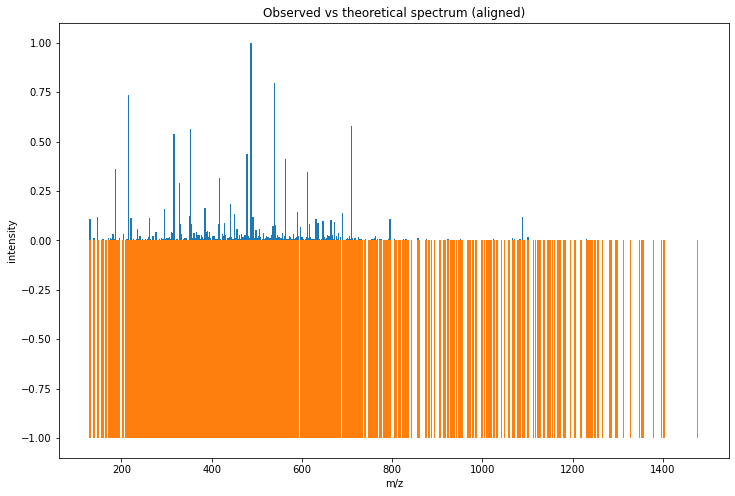

In [11]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for peptide_id in peptide_ids[0:100]:
    print (35*"=")
    print ("Peptide ID m/z:", peptide_id.getMZ()) 
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit sequence:", hit.getSequence())  
        spectra = filtered.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg = TheoreticalSpectrumGenerator()
        thspec = MSSpectrum()
        p = Param()
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        peptide = AASequence.fromString(hit.getSequence().toString())
        tsg.getSpectrum(thspec, peptide, 1, 2)
        
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
        
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)

        spa.getSpectrumAlignment(alignment, thspec, spectra)

        print("Number of matched peaks: " + str(len(alignment)))
        print("ion\ttheo. m/z\tobserved m/z")
        for theo_idx, obs_idx in alignment:
            ion_name = thspec.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = thspec.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(thspec[theo_idx].getMZ())
                  + "\t" + str(spectra[obs_idx].getMZ()))

        
        for theo_idx, obs_idx in alignment:
            theo_mz.append(thspec[theo_idx].getMZ())
            theo_int.append(thspec[theo_idx].getIntensity())
            obs_mz.append(spectra[obs_idx].getMZ())
            obs_int.append(spectra[obs_idx].getIntensity())
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)